<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/Analysis_of_multivariate_Quantitative_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of multivariate Quantitative Data**

In [ ]:
"""*****
This script downloads selected data files from the NHANES repository,
extracts selected columns, and merges across files to create one integrated
csv file.
****"""

import pandas
import os
from os import path
import pandas as pd
import numpy as np

# The base URL for all NHANES data
base = "https://wwwn.cdc.gov/Nchs/Nhanes"

# Demographics files
demo = [
    ("2003-2004", "DEMO_C.XPT"),
    ("2011-2012", "DEMO_G.XPT"),
    ("2015-2016", "DEMO_I.XPT"),
]

# Blood pressure files
bpx = [
    ("2003-2004", "BPX_C.XPT"),
    ("2011-2012", "BPX_G.XPT"),
    ("2015-2016", "BPX_I.XPT"),
]

# Body measures files
bmx = [
    ("2003-2004", "BMX_C.XPT"),
    ("2011-2012", "BMX_G.XPT"),
    ("2015-2016", "BMX_I.XPT"),
]

# Alcohol use
alq = [
    ("2003-2004", "ALQ_C.XPT"),
    ("2011-2012", "ALQ_G.XPT"),
    ("2015-2016", "ALQ_I.XPT"),
]

# Smoking
smq = [
    ("2003-2004", "SMQ_C.XPT"),
    ("2011-2012", "SMQ_G.XPT"),
    ("2015-2016", "SMQ_I.XPT"),
]

# Insurance
hiq = [
    ("2003-2004", "HIQ_C.XPT"),
    ("2011-2012", "HIQ_G.XPT"),
    ("2015-2016", "HIQ_I.XPT"),
]

# Variables to keep
kvar = ["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1", "DMDMARTL",
        "INDFMPIR", "DMDEDUC2", "DMDCITZN", "DMDHHSIZ",
        "BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2", "BMXWT",
        "BMXHT", "BMXBMI", "BMXWAIST", "BMXARMC", "BMXARML",
        "BMXLEG", "ALQ101", "ALQ110", "ALQ130", "SMQ020",
        "SMQ030", "SMD040", "HID010", "HID030A", "HIQ210",
        "HIQ220"]
kvar = set(kvar)

waves = [x[0] for x in demo]

# Create the directory structure
for di in "raw", "csv", "merged":
    try:
        os.mkdir(di)
    except FileExistsError:
        pass

    if di == "merged":
        continue

    for wave in waves:
        try:
            os.mkdir(path.join(di, wave))
        except FileExistsError:
            pass

# Download from the NHANES site
for fb in demo, bpx, bmx, alq, smq, hiq:
    for fi in fb:

        # Download if we don't already have it
        cmd = "wget -N -P %s %s" % (path.join("raw", fi[0]), path.join(base, *fi))
        os.system(cmd)

        # Extract columns of interest and save as csv.
        fname = path.join("raw", *fi)
        data = pd.read_sas(fname)
        cols = [x for x in data.columns if x in kvar]
        da = data.loc[:, cols]
        da.SEQN = da.SEQN.astype(np.int)
        out = path.join("csv", fi[0], fi[1].replace(".XPT", ".csv.gz"))
        da.to_csv(out, index=None, compression="gzip")

# Merge the files within each wave
for wave in waves:

    dfiles = os.listdir(path.join("csv", wave))
    dfiles = [f for f in dfiles if f.endswith(".csv.gz")]
    dfiles = [path.join("csv", wave, f) for f in dfiles]

    data = [pd.read_csv(f) for f in dfiles]

    da = data.pop(0)
    while len(data) > 0:
        da = pd.merge(da, data.pop(0), left_on="SEQN", right_on="SEQN", how="left")

    fname = path.join("merged", "nhanes_" +
    wave.replace("-", "_") + ".csv")
    da.to_csv(fname, index=False)

<ipython-input-2-0f633c4b7cf3>:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da.SEQN = da.SEQN.astype(np.int)
<ipython-input-2-0f633c4b7cf3>:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for mor

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("/content/merged/nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'HIQ210', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'RIAGENDR',
       'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ',
       'INDFMPIR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020'],
      dtype='object')

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2). Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

         BPXDI1   BPXDI2
BPXDI1  1.00000  0.87801
BPXDI2  0.87801  1.00000
          BPXDI1    BPXDI2
BPXDI1  1.000000  0.879555
BPXDI2  0.879555  1.000000


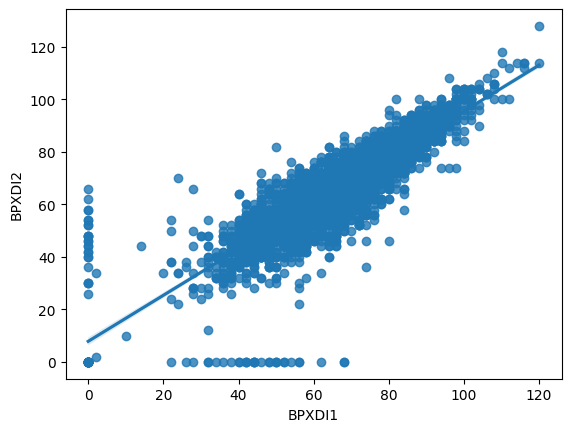

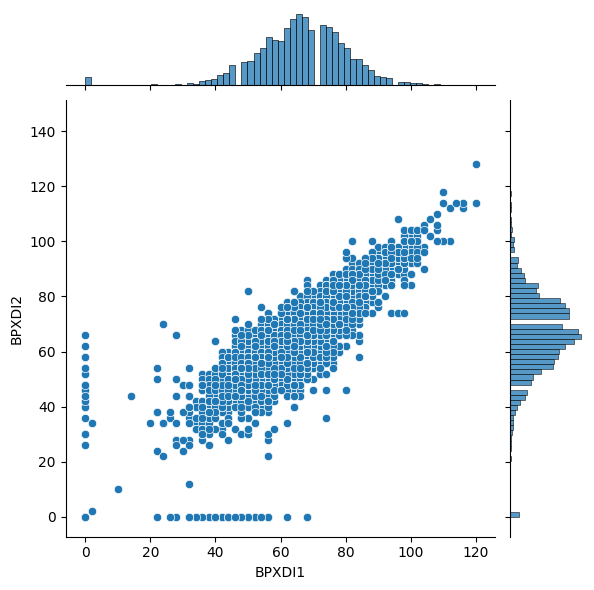

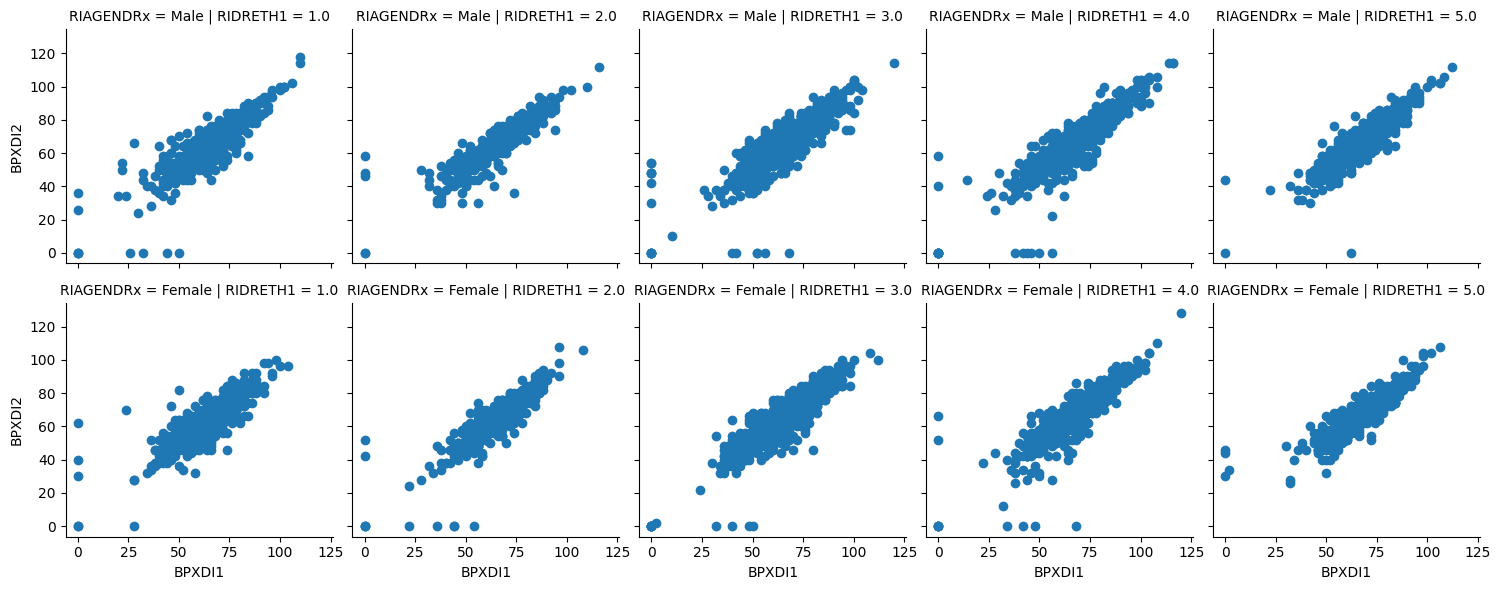

In [ ]:
sns.regplot(x="BPXDI1",y="BPXDI2" ,data=da)
sns.jointplot(x="BPXDI1", y="BPXDI2", data=da)
da["RIAGENDRx"]=da.RIAGENDR.replace({1:"Male",2:"Female"})
print(da.loc[da.RIAGENDRx=="Female",["BPXDI1","BPXDI2"]].dropna().corr())
print(da.loc[da.RIAGENDRx=="Male",["BPXDI1","BPXDI2"]].dropna().corr())
_=sns.FacetGrid(da,col="RIDRETH1",row="RIAGENDRx").map(plt.scatter,"BPXDI1","BPXDI2")

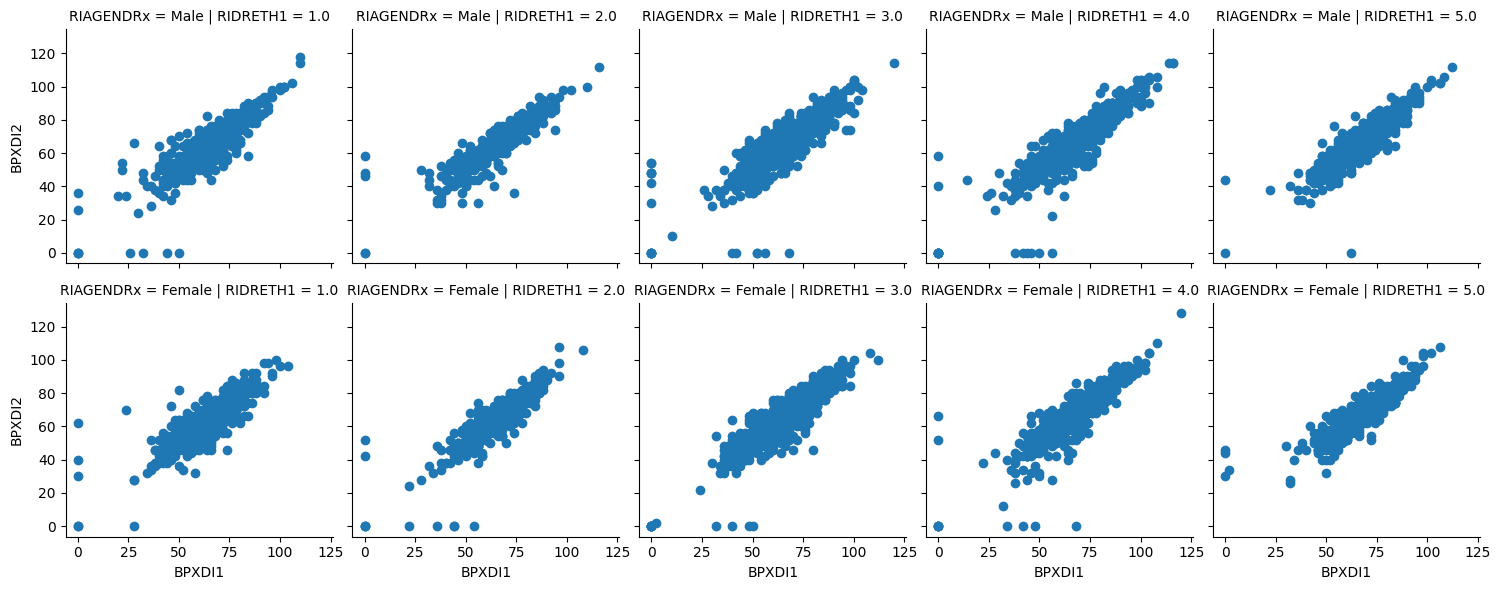

In [ ]:
#constructing a boolean value for age and gender
da["RIAGENDRx"] = da["RIAGENDR"].map({1: "Male", 2: "Female"})
first_systolic_dystolic= sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter,"BPXDI1","BPXDI2")

In [ ]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College",
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})




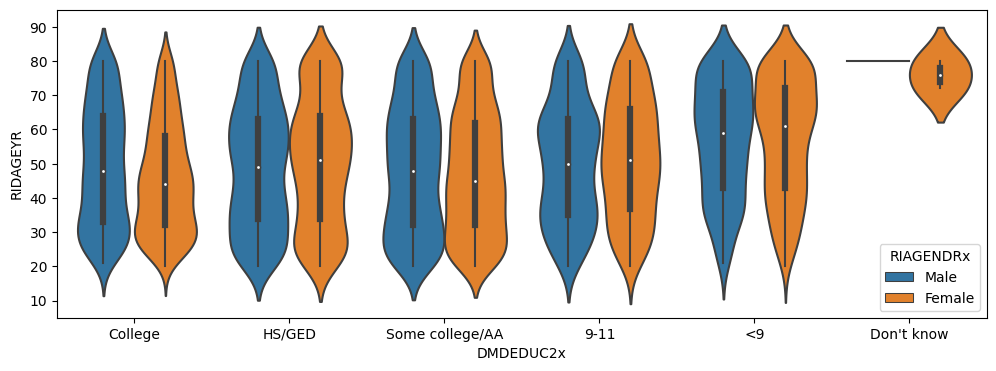

In [ ]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College",
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
plt.figure(figsize = (12,4))
ages_gender_educational_attainment = sns.violinplot(x=da.DMDEDUC2x, y=da.RIDAGEYR, hue=da.RIAGENDRx)

In [ ]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White",
                                      4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})
da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})
da["HIQ210x"].fillna("Missing", inplace = True)
freq_table = pd.crosstab(da.RIDRETH1x, da.HIQ210x)
freq_table.apply(lambda z: z/z.sum(), axis = 1)

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.001562,0.238417,0.682978,0.077043
Non-Hispanic Black,0.001409,0.104274,0.820573,0.073744
Non-Hispanic White,0.000978,0.085780,0.859752,0.053490
Other Hispanic,0.000000,0.181957,0.733180,0.084862
Other Race - Including Multi-Racial,0.001293,0.090498,0.847447,0.060763
